In [2]:
import sys
print("Current Python interpreter:", sys.executable)
print("Version:", sys.version)

Current Python interpreter: /workspaces/eng-ai-agents/.venv/bin/python
Version: 3.11.9 (main, Aug 14 2024, 03:58:18) [GCC 6.3.0 20170516]


In [19]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

device(type='cpu')

## Q1 Information Theory

In [ ]:
import torch

p = torch.tensor([
    [1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4,  0,    0,    0]
], dtype=torch.float)

px = p.sum(dim=0)
py = p.sum(dim=1)

def e(a):
    m = a>0
    b = a[m]
    return -(b*torch.log2(b)).sum()

hx = e(px)
hy = e(py)
hxy = e(p.view(-1))
hxgy = hxy - hy
hygx = hxy - hx

### a

In [28]:
val_a = abs(hxgy.item() - hygx.item())

if val_a < 1e-9:
    print("Yes")
else:
    print("No")

No


### b

In [27]:
lhs = hx - hxgy
rhs = hy - hygx
val_b = abs(lhs.item() - rhs.item())

if val_b < 1e-9:
    print("Yes")
else:
    print("No")

Yes


### c

In [25]:
ixy = hx + hy - hxy
print(ixy.item())

0.375


## Q2 MLE

### Task1

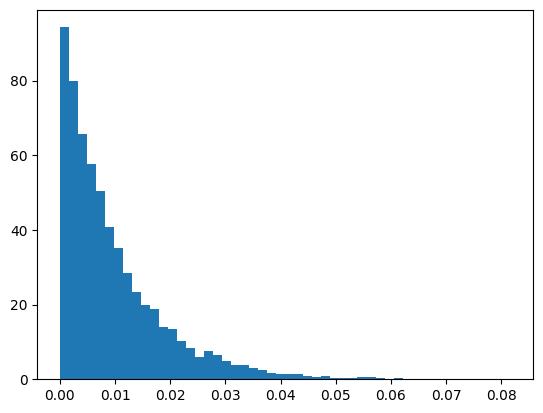

In [31]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
l=100
n=10000
x=np.random.exponential(1/l,n)
plt.hist(x,bins=50,density=True)
plt.show()

### Task 2

a 38.46448326342048


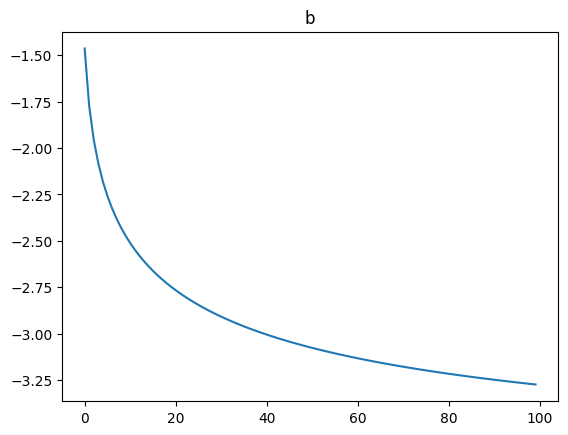

In [33]:
lr=0.001
ep=100
p=1.0
h=[]
def negll(a,b):
    return -np.log(b)+b*a
for _ in range(ep):
    idx=np.random.permutation(n)
    for i in idx:
        g=-1/p + x[i]
        p-=lr*g
    h.append(np.mean([negll(v,p) for v in x]))
print("a", p)
plt.plot(h)
plt.title("b")
plt.show()

## Q3 Linear Regression